# Auto ARIMA

reading from modelNone
reading from ../regression/CRAC3/CRAC3.out.csv


/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_76018/566510446.py:41: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')


train_size 30409 test_size 14979

Performing stepwise search to minimize aic


/Users/chantana/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (10) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/Users/chantana/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8885.859, Time=35.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15643.318, Time=2.79 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15459.911, Time=1.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15545.255, Time=4.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26138.820, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7047.497, Time=28.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6416.442, Time=24.87 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-11047.233, Time=28.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-10462.334, Time=29.00 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-10947.557, Time=33.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-10920.387, Time=31.86 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-7051.311, Time=39.00 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-10876.179, Time=29.62 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-11054.261, Time=38.70 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=-111

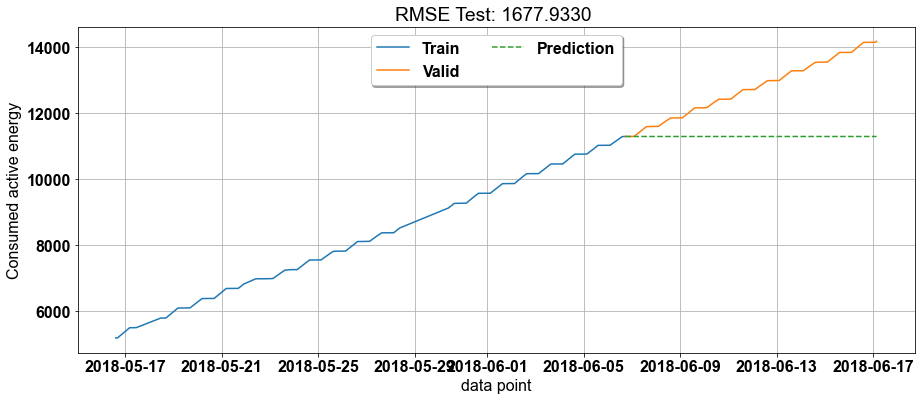

In [19]:


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib
 
   
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

from statsmodels.tsa.stattools import acf, pacf
#from pyramid.arima import auto_arima
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error
import random
from math import sqrt

# For serialization:
#from sklearn.externals import joblib


 

import joblib
import pickle

matplotlib.interactive(False) 
%matplotlib inline

csv_file = '../CRAC3/CRAC3.out.csv'

name = csv_file.split('/')[-1].split('.')[0]

#model_file = 'stepwise_arima254.pkl'
model_file = 'None'
 
print ('reading from model'+model_file)
 
#ACF and PACF plots:
print ('reading from '+csv_file)
rcParams['figure.figsize'] = 15, 6
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
# dateparse('2018-05-16 14:41:00')
data = pd.read_csv(csv_file, parse_dates=[0], index_col=0,date_parser=dateparse)
data.index = pd.DatetimeIndex(data.index.values,
                               freq=data.index.inferred_freq)
#print data.index
#print data.head()
#print data.dtypes
ts = data['Var50']
#print ts

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)



#Plot rolling statistics:


train_size = int(len(ts) * 0.67)
test_size = len(ts) - train_size

r = random.randint(1,1000)
 
print ('train_size %d test_size %d\n'%(train_size,test_size))
train,test =ts[0:train_size], ts[train_size:len(ts)]

if model_file == 'None':
    stepwise_model = auto_arima(train, start_p=2, start_q=2,
                           max_p=4, max_q=4, m=10,
                           start_P=0, seasonal=False,
                           d=1,max_d=1,  D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True, n_jobs=4 )
    print(stepwise_model.aic())

    stepwise_model.fit(train)
    print(stepwise_model.summary())

   
    filename = 'stepwise_arima'+name+str(r)+'.pkl'
    with open(filename, 'wb') as pkl:
        pickle.dump(stepwise_model, pkl) 
    #stepwise_model.save(filename)
    print ('saving to model pkl file '+filename +'\n')

else:
    with open(model_file, 'rb') as pkl:
        stepwise_model = pickle.load(pkl) 
      

 

future_forecast = stepwise_model.predict(n_periods=test_size)
#print(future_forecast.head())
future_forecast =  pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
 

#https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/

rmse = sqrt(mean_squared_error(test,future_forecast))

#plot the predictions for validation set
plt.grid("on")
plt.title('RMSE Test: %.4f '% rmse)
print('RMSE TEST %.4f '% rmse)


plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.grid("on")
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(future_forecast, label='Prediction',linestyle='--')
plt.legend(loc='upper center',  shadow=True, ncol=2)


plt.savefig( 'auto-'+name+str(r)+'-predicted-test.png')
plt.show()

# ARIMA

reading from ../regression/CRAC3/CRAC3.out.csv


/var/folders/ty/r8ylvb8n32b96f_fmbbsk5b40000gn/T/ipykernel_76018/2597263829.py:48: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
/Users/chantana/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


score file CRAC3-score.txt
ARIMA parameter p,d,q (3,1,3)
train_size 30409 test_size 14979



/Users/chantana/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


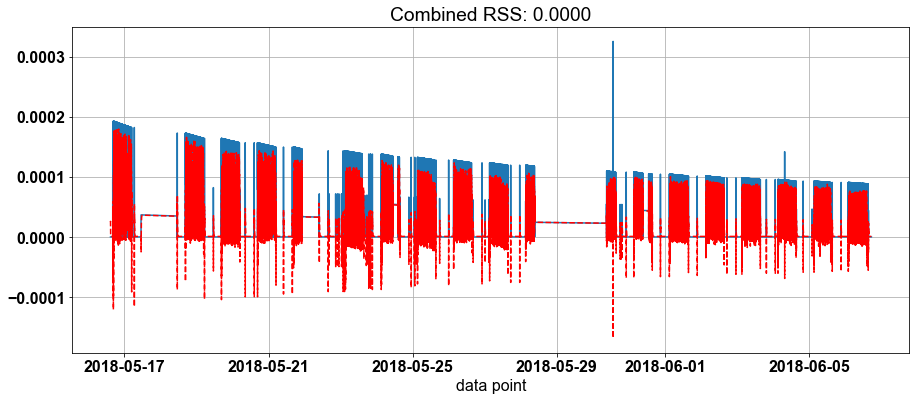

RMSE TRAIN 21.0674, 


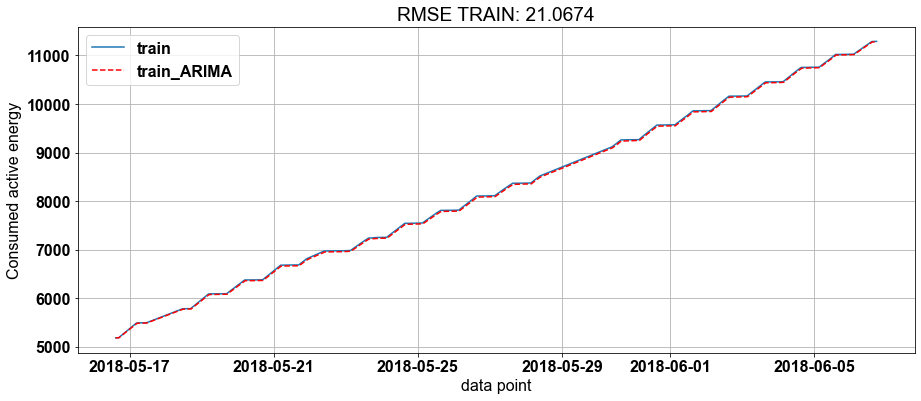

RMSE TEST 999.9153, 


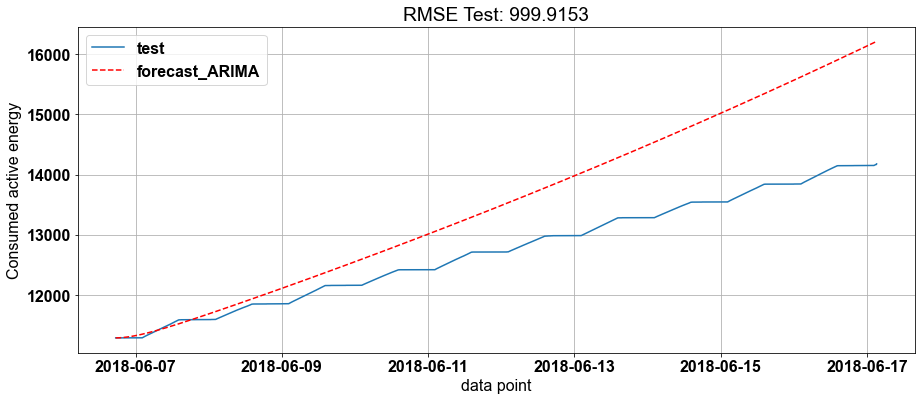

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.stattools import acf, pacf

import os
import sys
import argparse



def parse_args():
    desc = 'description'
    parser = argparse.ArgumentParser(description=desc)
    parser.add_argument("--d",default=1,type=int,help="d parameter default=1")
    parser.add_argument("--p",default=2,type=int,help="p parameter default=2")
    parser.add_argument("--q",default=2,type=int,help="q parameter default=2")
    parser.add_argument("--file",required=True,type=str,help="file name ")
    args = parser.parse_args()
    return args

#args = parse_args()

##csv_file = args.file
#d = args.d
#p = args.p
#q = args.q
####
csv_file = '../CRAC3/CRAC3.out.csv'
d = 1
p = 3
q = 3

path,filename= os.path.split(csv_file)
path1,arg0= os.path.split(sys.argv[0])

stitle=filename.split('.')[0]
#stitle1 = stitle+'-'+arg0
stitle1 = stitle

#ACF and PACF plots:
print ('reading from '+csv_file)
rcParams['figure.figsize'] = 15, 6
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
# dateparse('2018-05-16 14:41:00')
data = pd.read_csv(csv_file, parse_dates=[0], index_col=0,date_parser=dateparse)
data.index = pd.DatetimeIndex(data.index.values,
                               freq=data.index.inferred_freq)
#print data.index
#print data.head()
#print data.dtypes
ts = data['Var50']
#print ts

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)



#Plot rolling statistics:
ts_log = np.log(ts)
#eliminate stationary
#difference
ts_log_diff = ts_log - ts_log.shift()
#plt.plot(ts_log_diff,color='green',ls='-',label='log_shift_diff')
ts_log_diff.dropna(inplace=True)

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
#plt.subplot(121) 
#plt.grid("on")
#plt.xlabel("Lag")
#plt.plot(lag_acf)
#plt.axhline(y=0,linestyle='--',color='gray')
#plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
#plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
#plt.title('Autocorrelation Function')
#Plot PACF:
#plt.subplot(122)
#plt.xlabel("Lag")
#plt.grid("on")
#plt.plot(lag_pacf)
#plt.axhline(y=0,linestyle='--',color='gray')
#plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
#plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
#plt.title('Partial Autocorrelation Function')
#plt.tight_layout()
#plt.show()
#plt.savefig(stitle1+'-PAF.png')


res_file = open(stitle1+'-score.txt','a')
print('score file '+stitle1+'-score.txt')
res_file.write('%d,%d,%d,'%(p,d,q))
print('ARIMA parameter p,d,q (%d,%d,%d)'%(p,d,q))
#combine model

train_size = int(len(ts) * 0.67)
test_size = len(ts) - train_size

print ('train_size %d test_size %d\n'%(train_size,test_size))
train,test =ts[0:train_size], ts[train_size:len(ts)]
train_log,test_log =ts_log[0:train_size], ts_log[train_size:len(ts_log)]
train_log_diff = train_log - train_log.shift()

train_log_diff.dropna(inplace=True)
lag_acf = acf(train_log_diff, nlags=20)
lag_pacf = pacf(train_log_diff, nlags=20, method='ols')
start_index = train_size 
end_index = start_index+test_size-1
#print start_index, end_index, (end_index-start_index)
model = ARIMA(train_log, order=(p,d,q))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff,label='log_diff')
plt.plot(results_ARIMA.fittedvalues, color='red',ls='--')
plt.title('Combined RSS: %.4f'% sum((results_ARIMA.fittedvalues-train_log_diff)**2))
res_file.write('%.4f,'% (sum((results_ARIMA.fittedvalues-train_log_diff)**2)))
plt.xlabel("data point")
plt.grid("on")
plt.savefig(stitle1+'-'+str(p)+'-'+str(d)+'-'+str(q)+'-combined.png')
plt.show()

plt.gcf()
plt.clf()
#take back
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(train_log.iloc[0], index=train_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(train,label='train')
plt.plot(predictions_ARIMA,label='train_ARIMA',ls='--',color='red')
plt.title('RMSE TRAIN: %.4f'% np.sqrt(sum((predictions_ARIMA-train)**2)/train_size))
res_file.write('%.4f, '% (np.sqrt(sum((predictions_ARIMA-train)**2)/train_size)))
print('RMSE TRAIN %.4f, '% (np.sqrt(sum((predictions_ARIMA-train)**2)/train_size)))
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.legend()
plt.grid("on")
plt.savefig(stitle1+'-'+str(p)+'-'+str(d)+'-'+str(q)+'-predicted-trained.png')
plt.show()


#predict
forecast = results_ARIMA.predict(start=start_index,end=end_index)
plt.gcf()
plt.clf()
#take back
predictions_ARIMA_diff = pd.Series(forecast, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(test_log.iloc[0], index=test_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
#for i in range(len(test)):
#    print(test[i],predictions_ARIMA[i])
plt.plot(test,label='test')
plt.plot(predictions_ARIMA,label='forecast_ARIMA',ls='--',color='red')
plt.legend()
plt.title('RMSE Test: %.4f'% np.sqrt(sum((predictions_ARIMA-test)**2)/test_size))
res_file.write('%.4f\n'% (np.sqrt(sum((predictions_ARIMA-test)**2)/test_size)))
print('RMSE TEST %.4f, '% (np.sqrt(sum((predictions_ARIMA-test)**2)/test_size)))
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.grid("on")
plt.savefig(stitle1+'-'+str(p)+'-'+str(d)+'-'+str(q)+'-predicted-test.png')
plt.show()
res_file.close()

